In [2]:
import pandas as pd

In [67]:
def hitter_abilities(year):
    df = pd.read_csv(f'Hitter Abilities Data {year}.csv', index_col=False).drop('Unnamed: 15', axis=1)
    cdf = pd.read_csv(f'Catcher Framing Data {year}.csv', index_col=False)#.drop('Unnamed: 15', axis=1)
    hpdf = pd.read_csv(f'HP 1B Data {year}.csv', index_col=False)#.drop('Unnamed: 15', axis=1)
    dpdf = pd.read_csv(f'DP Data {year}.csv', index_col=False)#.drop('Unnamed: 15', axis=1)    

    # Aggressive/Patient Hitter   Swing %
    swing_percent_mean = df['swing_percent'].mean()
    swing_percent_std = df['swing_percent'].std()
    df['ZSwingPercent'] = (df['swing_percent'] - swing_percent_mean) / swing_percent_std
    df['AggressiveHitter'] = False
    df['PatientHitter'] = False
    df.loc[df['ZSwingPercent'] >= 1, 'AggressiveHitter'] = True
    df.loc[df['ZSwingPercent'] <= -1, 'PatientHitter'] = True
    
    # Free Swinger                K %
    k_percent_mean = df['b_k_percent'].mean()
    k_percent_std = df['b_k_percent'].std()
    df['ZKPercent'] = (df['b_k_percent'] - k_percent_mean) / k_percent_std
    df['FreeSwinger'] = False
    df.loc[df['ZKPercent'] >= 1, 'FreeSwinger'] = True
    
    # Good/Great Catcher          Framing
    cdf = cdf[cdf['last_name'] != 'League Average']
    sp_mean = cdf['strike_rate'].mean()
    sp_std = cdf['strike_rate'].std()
    cdf['ZSP'] = (cdf['strike_rate'] - sp_mean) / sp_std
    cdf['GoodCatcher'] = False
    cdf['GreatCatcher'] = False
    cdf.loc[(cdf['ZSP'] >= 0.25) & (cdf['ZSP'] < 2.0), 'GoodCatcher'] = True
    cdf.loc[cdf['ZSP'] >= 2.0, 'GreatCatcher'] = True
    cdf = cdf[['player_id', 'GoodCatcher', 'GreatCatcher']]
        
    # Good Infield Hitter         HP to 1B
    hp_mean = hpdf['hp_to_1b'].mean()
    hp_std = hpdf['hp_to_1b'].std()
    hpdf['ZHP'] = -(hpdf['hp_to_1b'] - hp_mean) / hp_std
    
    hpdf['GdIFHtr'] = False
    hpdf['GrtIFHtr'] = False
    hpdf.loc[(hpdf['ZHP'] >= 1) & (hpdf['ZHP'] < 2.0), 'GdIFHtr'] = True
    hpdf.loc[hpdf['ZHP'] >= 2.0, 'GrtIFHtr'] = True
    hpdf = hpdf[['player_id', 'GdIFHtr', 'GrtIFHtr']]
    
    # Pivot Man                   DP/Inn (Fangraphs)
    dpdf = dpdf[dpdf['Pos'].isin(['SS', '2B'])]
    dpdf['DP/Inn'] = dpdf['DP'] / dpdf['Inn']
    dpinn_mean = dpdf['DP/Inn'].mean()
    dpinn_std = dpdf['DP/Inn'].std()
    dpdf['ZDPInn'] = (dpdf['DP/Inn'] - dpinn_mean) / dpinn_std
    dpdf['PivotMan'] = False
    dpdf.loc[dpdf['ZDPInn'] >= 0.75, 'PivotMan'] = True
    
    # Contact Hitter              Hit %
    df['Hit%'] = df['b_total_hits'] / df['b_total_pa']
    h_percent_mean = df['Hit%'].mean()
    h_percent_std = df['Hit%'].std()
    df['ZHPercent'] = (df['Hit%'] - h_percent_mean) / h_percent_std
    df['ContactHitter'] = False
    df.loc[df['ZHPercent'] >= 1.5, 'ContactHitter'] = True
    
    # Power Hitter                HR %
    df['HR%'] = df['b_home_run'] / df['b_total_pa']
    hr_percent_mean = df['HR%'].mean()
    hr_percent_std = df['HR%'].std()
    df['ZHRPercent'] = (df['HR%'] - hr_percent_mean) / hr_percent_std
    df['PowerHitter'] = False
    df.loc[df['ZHRPercent'] >= 1.5, 'PowerHitter'] = True
    
    # Pull Hitter                 Pull %  
    pull_percent_mean = df['pull_percent'].mean()
    pull_percent_std = df['pull_percent'].std()
    df['ZPullPercent'] = (df['pull_percent'] - pull_percent_mean) / pull_percent_std
    df['PullHitter'] = False
    df.loc[df['ZPullPercent'] >= 0.5, 'PullHitter'] = True
    
    # Push Hitter                 Push %
    push_percent_mean = df['opposite_percent'].mean()
    push_percent_std = df['opposite_percent'].std()
    df['ZPushPercent'] = (df['opposite_percent'] - push_percent_mean) / push_percent_std
    df['PushHitter'] = False
    df.loc[df['ZPushPercent'] >= 0.5, 'PushHitter'] = True
    
    # Refined                     BA - xBA
    diff_percent_mean = df['xbadiff'].mean()
    diff_percent_std = df['xbadiff'].std()
    df['ZDiff'] = (df['xbadiff'] - diff_percent_mean) / diff_percent_std
    df['Refined'] = False
    df.loc[df['ZDiff'] >= 1.5, 'Refined'] = True
    
    # Slap Hitter/Slugger         Hard Hit %
    hh_percent_mean = df['hard_hit_percent'].mean()
    hh_percent_std = df['hard_hit_percent'].std()
    df['ZHHPercent'] = (df['hard_hit_percent'] - hh_percent_mean) / hh_percent_std
    df['Slugger'] = False
    df['SlapHitter'] = False
    df.loc[df['ZHHPercent'] >= 1.25, 'Slugger'] = True
    df.loc[df['ZHHPercent'] <= -1.25, 'SlapHitter'] = True
    
    # Spray Hitter                Pull/Push%
    df['Sprange'] = df.apply(lambda x: max(x['pull_percent'], x['opposite_percent'], x['straightaway_percent']) - min(x['pull_percent'], x['opposite_percent'], x['straightaway_percent']), axis=1)
    sprange_percent_mean = df['Sprange'].mean()
    sprange_percent_std = df['Sprange'].std()
    df['ZSprange'] = (df['Sprange'] - sprange_percent_mean) / sprange_percent_std
    df['SprayHitter'] = False
    df.loc[df['ZSprange'] <= -1.25, 'SprayHitter'] = True
    
    # Tough Out                   Solid Contact %
    sc_percent_mean = df['solidcontact_percent'].mean()
    sc_percent_std = df['solidcontact_percent'].std()
    df['ZSCPercent'] = (df['solidcontact_percent'] - sc_percent_mean) / sc_percent_std
    df['ToughOut'] = False
    df.loc[df['ZSCPercent'] >= 1, 'ToughOut'] = True
    
    # Joins
    player_map = pd.read_csv('../PLAYERIDMAP 2022.csv')[['IDFANGRAPHS', 'PLAYERNAME', 'MLBID']]
    dpdf['playerid'] = dpdf['playerid'].astype(str)
    dpdf = dpdf[['playerid','PivotMan']].merge(player_map, how='left', left_on='playerid', right_on='IDFANGRAPHS').set_index('MLBID')[['PLAYERNAME', 'PivotMan']].reset_index()
        
    df = (
        df.merge(cdf, how='left', on='player_id').fillna(False)
        .merge(hpdf, how='left', on='player_id').fillna(False)
        .merge(dpdf, how='left', left_on='player_id', right_on='MLBID').fillna(False)
    )
    
    print(df.columns)
    columns = ['player_id', 'AggressiveHitter', 'PatientHitter', 'FreeSwinger', 'ContactHitter', 'PowerHitter', 'PullHitter', 'PushHitter', 'SprayHitter', 'ToughOut', 'Slugger', 'SlapHitter', 'Refined', 'GoodCatcher', 'GreatCatcher', 'GdIFHtr', 'GrtIFHtr', 'PivotMan']
    return df#[columns].set_index('player_id')

ha_df = hitter_abilities(2022)
ha_df.head(20)

Index(['last_name', ' first_name', 'player_id', 'year', 'b_total_pa',
       'b_total_hits', 'b_home_run', 'b_k_percent', 'xbadiff',
       'solidcontact_percent', 'hard_hit_percent', 'swing_percent',
       'pull_percent', 'straightaway_percent', 'opposite_percent',
       'ZSwingPercent', 'AggressiveHitter', 'PatientHitter', 'ZKPercent',
       'FreeSwinger', 'Hit%', 'ZHPercent', 'ContactHitter', 'HR%',
       'ZHRPercent', 'PowerHitter', 'ZPullPercent', 'PullHitter',
       'ZPushPercent', 'PushHitter', 'ZDiff', 'Refined', 'ZHHPercent',
       'Slugger', 'SlapHitter', 'Sprange', 'ZSprange', 'SprayHitter',
       'ZSCPercent', 'ToughOut', 'GoodCatcher', 'GreatCatcher', 'GdIFHtr',
       'GrtIFHtr', 'MLBID', 'PLAYERNAME', 'PivotMan'],
      dtype='object')


,last_name,first_name,player_id,year,b_total_pa,b_total_hits,b_home_run,b_k_percent,xbadiff,solidcontact_percent,...,SprayHitter,ZSCPercent,ToughOut,GoodCatcher,GreatCatcher,GdIFHtr,GrtIFHtr,MLBID,PLAYERNAME,PivotMan
0,Pujols,Albert,405395,2022,351,83,24,15.7,0.008,7.0,...,False,0.494209,False,False,False,False,False,False,False,False
1,Cabrera,Miguel,408234,2022,433,101,5,23.3,0.020,3.7,...,False,-1.362136,False,False,False,False,False,False,False,False
2,Molina,Yadier,425877,2022,270,56,5,14.8,-0.016,4.9,...,False,-0.687101,False,True,False,False,False,False,False,False
3,Cruz Jr.,Nelson,443558,2022,507,105,10,23.5,-0.007,4.5,...,True,-0.912113,False,False,False,False,False,False,False,False
4,Peralta,David,444482,2022,490,110,12,23.3,0.002,9.1,...,False,1.675519,True,False,False,False,False,False,False,False
5,Longoria,Evan,446334,2022,298,65,14,27.9,0.011,10.2,...,False,2.294301,True,False,False,False,False,False,False,False
6,Blackmon,Charlie,453568,2022,577,140,16,18.9,0.008,4.0,...,False,-1.193377,False,False,False,False,False,False,False,False
7,Maldonado,Martin,455117,2022,379,64,15,30.6,0.005,6.0,...,False,-0.068320,False,False,False,False,False,False,False,False
8,Solano,Donovan,456781,2022,304,79,4,20.1,0.016,6.8,...,False,0.381703,False,False,False,False,False,False,False,False
9,McCutchen,Andrew,457705,2022,580,122,17,21.4,-0.015,5.8,...,False,-0.180825,False,False,False,False,False,False,False,False


In [66]:
ha_df.to_csv("2022_Hitter_Ability.csv")

In [72]:
ha_df[ha_df['last_name'] == 'Fletcher']['Slugger']

Series([], Name: Slugger, dtype: bool)

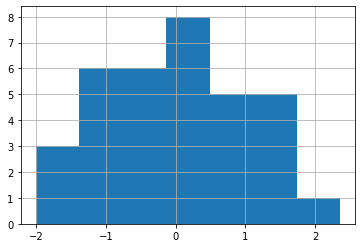

In [48]:
hist = ha_df['ZDPInn'].hist(bins=7)

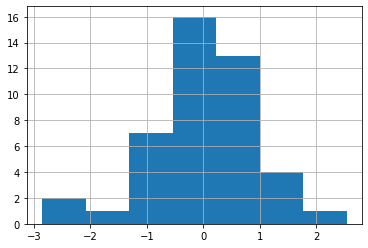

In [11]:
hist2 = ha_df['ZSP'].hist(bins=7)

In [50]:
len(ha_df[ha_df['ZDPInn'] >= 0.75])

9

In [36]:
len(ha_df[ha_df['ZHP'] >= 2])

2

In [102]:
ha_df[ha_df['Refined']]

,last_name,player_id,AggressiveHitter,PatientHitter,FreeSwinger,ContactHitter,PowerHitter,PullHitter,PushHitter,SprayHitter,ToughOut,Slugger,SlapHitter,Refined
21,Goldschmidt,502671,False,True,False,True,True,False,True,False,True,False,False,True
22,Altuve,514888,False,False,False,False,False,True,False,False,False,False,True,True
55,Grichuk,545341,False,False,False,False,False,False,False,False,False,False,False,True
70,Myers,571976,False,False,True,False,False,False,True,True,True,False,False,True
73,Taylor,572191,False,False,False,False,False,False,False,False,False,False,False,True
87,Machado,592518,False,False,False,True,False,False,False,False,True,True,False,True
94,Bogaerts,593428,False,False,False,True,False,False,False,False,False,False,False,True
137,Reynolds,608703,False,True,True,False,False,False,True,False,True,False,False,True
163,McGuire,624512,False,False,False,False,False,False,True,True,False,False,True,True
185,Benintendi,643217,False,False,False,True,False,False,True,False,False,False,False,True


In [2]:
# If attribute is listed it is decided on vibes and/or by a not-Savant statistic/split
# HITTERS
    # Aggressive/Patient Hitter   Swing %
    # Free Swinger                K %
    # Good/Great Catcher          Framing
    # Good Infield Hitter         HP to 1B
    # Hot Hitter                  Multi-Hit Games (http://hosted.stats.com/mlb/getleaders.asp?rank=017)
    # Pivot Man                   DP/Inn (Fangraphs)
    # Contact Hitter              Hit %
    # Power Hitter                HR %
    # Pull Hitter                 Pull %    
    # Push Hitter                 Push %
    # Refined                     BA - xBA
    # Slap Hitter/Slugger         Hard Hit %
    # Spray Hitter                Pull/Push%
    # Tough Out                   Solid Contact %

# PITCHERS
    # Power/Breaking Ball Pitcher FB %
    # Dr. K                       K %
    # Fastball Life               4-Seam Spin
    # Groundball/Flyball Pitcher  GB% Fly%
    # Gyroball                    4-Seam Spin
    # Shuuto Spin                 4-Seam H Movement
    # Spin                        BB Avg Spin
    # Walk                        BB %